In [1]:
import sys
sys.path.insert(0, '/media/allen/mass/deep-learning-works/')
from src.factory.data_factory import DataFactory
from src.factory.config_factory import _C as cfg

In [ ]:
cfg.DB.DATA = 'imagenet'

In [ ]:
data = DataFactory.produce()

In [2]:
from PIL import Image
import lmdb
import io

In [3]:
f = open('/home/allen/67.jpg', 'rb')
img_str = f.read()

In [4]:
lmdb_env = lmdb.open("/media/allen/mass/DB/imagenet_lmdb", map_size=int(1e12))
lmdb_txn = lmdb_env.begin(write=True)


key = 'two_people.jpg'
lmdb_txn.put(key.encode(), img_str)
lmdb_txn.commit()

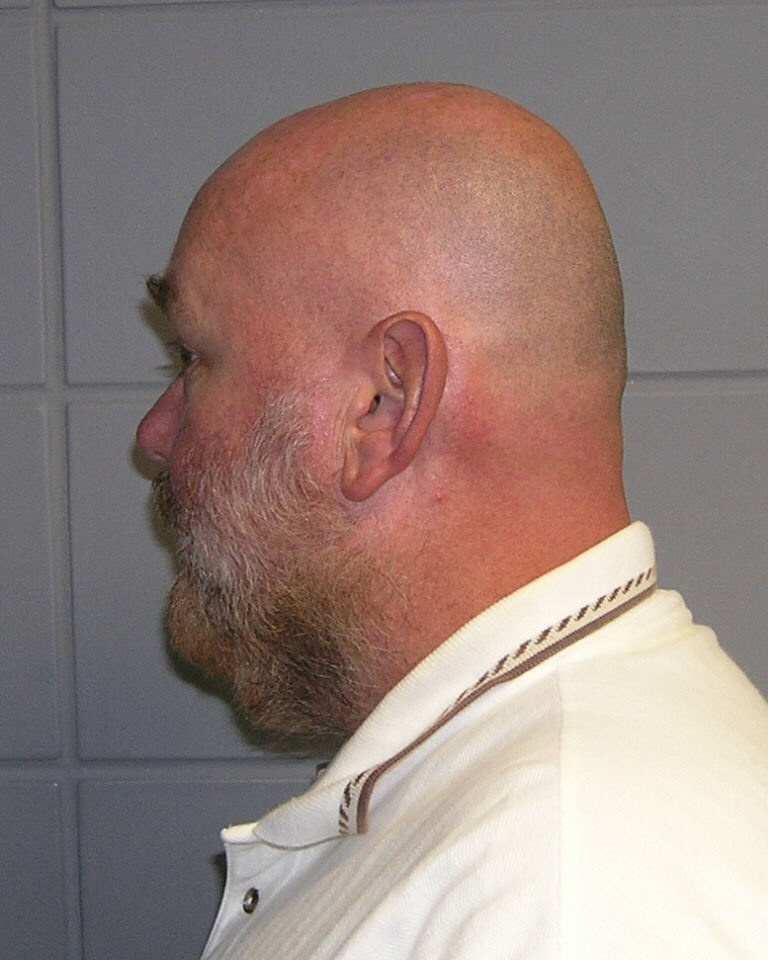

In [10]:
test_lmdb_env = lmdb.open("/media/allen/mass/DB/imagenet_lmdb")
test_lmdb_txn = test_lmdb_env.begin()

key = 'two_people.jpg'
raw = test_lmdb_txn.get(key.encode())
img_byte = io.BytesIO(raw)
test_img = Image.open(img_byte)
test_img